In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('../data/stocks_panel.csv', parse_dates=['Date'])

In [3]:
df.head()

,Date,Stock,Price
0,2014-11-05,AAPL,108.860001
1,2014-11-05,AMZN,296.519989
2,2014-11-05,FB,74.830002
3,2014-11-05,MSFT,47.860001
4,2014-11-05,GOOGL,555.950012


In [8]:
df['Day'] = df['Date'].dt.day

In [9]:
df.head()

,Date,Stock,Price,Day
0,2014-11-05,AAPL,108.860001,5
1,2014-11-05,AMZN,296.519989,5
2,2014-11-05,FB,74.830002,5
3,2014-11-05,MSFT,47.860001,5
4,2014-11-05,GOOGL,555.950012,5


In [10]:
df = df.set_index(['Stock', 'Date'])

In [12]:
df.head(10)

,,Price,Day
Stock,Date,,
AAPL,2014-11-05,108.860001,5
AMZN,2014-11-05,296.519989,5
FB,2014-11-05,74.830002,5
MSFT,2014-11-05,47.860001,5
GOOGL,2014-11-05,555.950012,5
FB,2014-11-06,75.260002,6
GOOGL,2014-11-06,551.690002,6
AMZN,2014-11-06,296.640015,6
AAPL,2014-11-06,108.699997,6


In [16]:
df = df.sort_index(level=0)

In [19]:
df['Price'].shift(4)

Stock  Date      
AAPL   2014-11-05           NaN
       2014-11-06           NaN
       2014-11-07           NaN
       2014-11-10           NaN
       2014-11-11    108.860001
                        ...    
MSFT   2019-10-28    136.369995
       2019-10-29    137.240005
       2019-10-30    139.940002
       2019-10-31    140.729996
       2019-11-01    144.190002
Name: Price, Length: 6285, dtype: float64

In [21]:
df.shift()

Price   Day
Stock Date                        
AAPL  2014-11-05         NaN   NaN
      2014-11-06  108.860001   5.0
      2014-11-07  108.699997   6.0
      2014-11-10  109.010002   7.0
      2014-11-11  108.830002  10.0
...                      ...   ...
MSFT  2019-10-28  140.729996  25.0
      2019-10-29  144.190002  28.0
      2019-10-30  142.830002  29.0
      2019-10-31  144.610001  30.0
      2019-11-01  143.369995  31.0

[6285 rows x 2 columns]

In [23]:
df['Price'].mean(level=1)

Date
2014-11-05    216.804001
2014-11-06    216.198003
2014-11-07    216.993998
2014-11-10    219.211993
2014-11-11    221.295997
                 ...    
2019-10-28    729.739987
2019-10-29    719.759998
2019-10-30    723.361987
2019-10-31    723.848013
2019-11-01    731.369989
Name: Price, Length: 1257, dtype: float64

In [25]:
df['Price'].shift(level=0)

TypeError: shift() got an unexpected keyword argument 'level'

In [28]:
df['1Day'] = df.groupby(level=0)['Price'].shift()

In [29]:
df['2Day'] = df.groupby(level=0)['Price'].shift(2)

In [30]:
df.head()

Price  Day        1Day        2Day
Stock Date                                               
AAPL  2014-11-05  108.860001    5         NaN         NaN
      2014-11-06  108.699997    6  108.860001         NaN
      2014-11-07  109.010002    7  108.699997  108.860001
      2014-11-10  108.830002   10  109.010002  108.699997
      2014-11-11  109.699997   11  108.830002  109.010002

In [32]:
df = df.reset_index()

In [33]:
df.head()

,Stock,Date,Price,Day,1Day,2Day
0,AAPL,2014-11-05,108.860001,5,NaN,NaN
1,AAPL,2014-11-06,108.699997,6,108.860001,NaN
2,AAPL,2014-11-07,109.010002,7,108.699997,108.860001
3,AAPL,2014-11-10,108.830002,10,109.010002,108.699997
4,AAPL,2014-11-11,109.699997,11,108.830002,109.010002


In [34]:
df[df.Stock == 'GOOGL']

,Stock,Date,Price,Day,1Day,2Day
3771,GOOGL,2014-11-05,555.950012,5,NaN,NaN
3772,GOOGL,2014-11-06,551.690002,6,555.950012,NaN
3773,GOOGL,2014-11-07,551.820007,7,551.690002,555.950012
3774,GOOGL,2014-11-10,558.229980,10,551.820007,551.690002
3775,GOOGL,2014-11-11,561.289978,11,558.229980,551.820007
...,...,...,...,...,...,...
5023,GOOGL,2019-10-28,1288.979980,28,1264.300049,1259.109985
5024,GOOGL,2019-10-29,1260.660034,29,1288.979980,1264.300049
5025,GOOGL,2019-10-30,1260.699951,30,1260.660034,1288.979980
5026,GOOGL,2019-10-31,1258.800049,31,1260.699951,1260.660034


In [35]:
?df.sum

In [ ]:
df.sum(level=0)

In [37]:
df = df.set_index(['Stock', 'Date']).sort_index(level=0)

In [41]:
df.shift(level=1)

TypeError: shift() got an unexpected keyword argument 'level'

In [42]:
df = pd.read_csv('../data/titanic.csv')

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
?df.plot

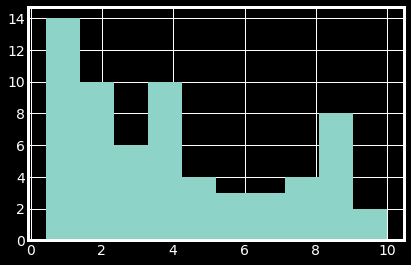

In [55]:
df[df.Age.between(0, 10)]['Age'].hist();

In [50]:
from matplotlib.pyplot import style

In [51]:
style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [54]:
style.use('dark_background')

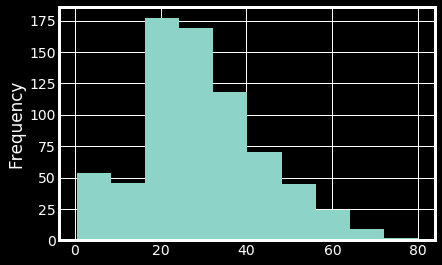

In [56]:
df['Age'].plot(kind='hist')

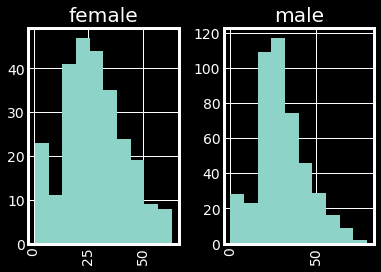

In [58]:
df.hist(column='Age', by='Sex');

In [59]:
import matplotlib.pyplot as plt

In [60]:
?df.plot

In [61]:
import seaborn as sns

C:\Users\Jonat\Anaconda\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Jonat\Anaconda\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


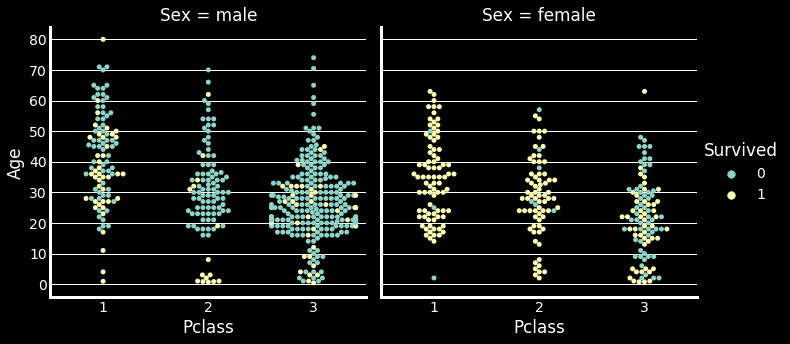

In [64]:
sns.catplot(x='Pclass', y='Age', kind='swarm', hue='Survived', col='Sex', data=df);

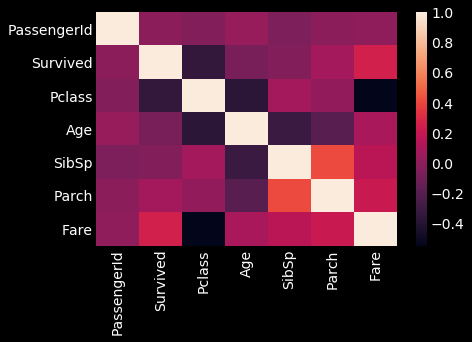

In [66]:
sns.heatmap(df.corr());